#Proyecto William Raul Mora

Planteamiento del problema

una empresa de telecomunicaciones presta servicios de internet satelital a zonas rurales de Colombia.
Para tener un mayor control financiero y prestar atención más efectiva requiere una aproximación de posibles fallas por departamento.

Para esto tenemos la información de los PQRSD creados por departamento desde 2023-01-01 hasta 2024-08-30



#Cargar DataSet

In [ ]:
import pandas as pd

# Cargar el dataset
df = pd.read_excel('/content/data_proyecto_departamento_solo_mes.xlsx')

# Convertir la columna "mes" a formato datetime
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y-%m-%d')
df.set_index('fecha', inplace=True)
df.index = df.index.to_period('M').to_timestamp()

# Mostrar las primeras filas del DataFrame
df.head()

,Departamento,cantidad
fecha,,
2023-01-01,AMAZONAS,0
2023-02-01,AMAZONAS,0
2023-03-01,AMAZONAS,0
2023-04-01,AMAZONAS,0
2023-05-01,AMAZONAS,0


#Crear un diccionario para almacenar las series temporales por departamento

In [ ]:
# Crear un diccionario para almacenar las series temporales por nombre
series_temporales = {}

# Iterar sobre cada nombre único en la columna 'Departamento'
for nombre, grupo in df.groupby('Departamento'):
    series_temporales[nombre] = grupo

# Mostrar el diccionario
for nombre, serie in series_temporales.items():
    print(f"Departamento: {nombre}")
    print(serie)

Departamento: AMAZONAS
           Departamento  cantidad
fecha                            
2023-01-01     AMAZONAS         0
2023-02-01     AMAZONAS         0
2023-03-01     AMAZONAS         0
2023-04-01     AMAZONAS         0
2023-05-01     AMAZONAS         0
2023-06-01     AMAZONAS         1
2023-07-01     AMAZONAS         2
2023-08-01     AMAZONAS         2
2023-09-01     AMAZONAS         4
2023-10-01     AMAZONAS         6
2023-11-01     AMAZONAS         8
2023-12-01     AMAZONAS        30
2024-01-01     AMAZONAS        30
2024-02-01     AMAZONAS        32
2024-03-01     AMAZONAS        22
2024-04-01     AMAZONAS        12
2024-05-01     AMAZONAS        18
2024-06-01     AMAZONAS         7
2024-07-01     AMAZONAS        20
2024-08-01     AMAZONAS        19
Departamento: ARAUCA
           Departamento  cantidad
fecha                            
2023-01-01       ARAUCA        58
2023-02-01       ARAUCA        30
2023-03-01       ARAUCA        25
2023-04-01       ARAUCA        27
2023

#Crear diccionarios para almacenar los conjuntos de entrenamiento y prueba

In [ ]:


# Crear diccionarios para almacenar los conjuntos de entrenamiento y prueba
x_train_series = {}
x_test_series = {}
y_train_series = {}
y_test_series = {}

# Iterar sobre cada departamento y dividir los datos
for nombre, serie in series_temporales.items():
    # Separar las características (X) y la variable objetivo (y)
    X = serie.drop('cantidad', axis=1)  # Asumiendo que solo 'cantidad' es la variable objetivo
    y = serie['cantidad']

    # Dividir los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)  # No hacer shuffle para datos temporales


 # Establecer la frecuencia en los índices
    X_train.index = X_train.index.to_period('M').to_timestamp()
    X_test.index = X_test.index.to_period('M').to_timestamp()
    y_train.index = y_train.index.to_period('M').to_timestamp()
    y_test.index = y_test.index.to_period('M').to_timestamp()

    # Almacenar en los diccionarios
    x_train_series[nombre] = X_train
    x_test_series[nombre] = X_test
    y_train_series[nombre] = y_train
    y_test_series[nombre] = y_test

# Mostrar el resultado
for nombre in x_train_series.keys():
    print(f"Departamento: {nombre}")
    print("X_train:")
    print(x_train_series[nombre])
    print("X_test:")
    print(x_test_series[nombre])
    print("y_train:")
    print(y_train_series[nombre])
    print("y_test:")
    print(y_test_series[nombre])

Departamento: AMAZONAS
X_train:
           Departamento
fecha                  
2023-01-01     AMAZONAS
2023-02-01     AMAZONAS
2023-03-01     AMAZONAS
2023-04-01     AMAZONAS
2023-05-01     AMAZONAS
2023-06-01     AMAZONAS
2023-07-01     AMAZONAS
2023-08-01     AMAZONAS
2023-09-01     AMAZONAS
2023-10-01     AMAZONAS
2023-11-01     AMAZONAS
2023-12-01     AMAZONAS
2024-01-01     AMAZONAS
2024-02-01     AMAZONAS
2024-03-01     AMAZONAS
2024-04-01     AMAZONAS
X_test:
           Departamento
fecha                  
2024-05-01     AMAZONAS
2024-06-01     AMAZONAS
2024-07-01     AMAZONAS
2024-08-01     AMAZONAS
y_train:
fecha
2023-01-01     0
2023-02-01     0
2023-03-01     0
2023-04-01     0
2023-05-01     0
2023-06-01     1
2023-07-01     2
2023-08-01     2
2023-09-01     4
2023-10-01     6
2023-11-01     8
2023-12-01    30
2024-01-01    30
2024-02-01    32
2024-03-01    22
2024-04-01    12
Freq: MS, Name: cantidad, dtype: int64
y_test:
fecha
2024-05-01    18
2024-06-01     7
2024-07-01

In [ ]:
    #x_train_series['AMAZONAS']
    #y_train_series['AMAZONAS']
    #x_test_series['AMAZONAS']
    y_test_series['AMAZONAS']

   #y_test_series['AMAZONAS']
#y_train_series['AMAZONAS']

,cantidad
fecha,
2024-05-01,18
2024-06-01,7
2024-07-01,20
2024-08-01,19


#Graficar todas las series temporales en un solo gráfico

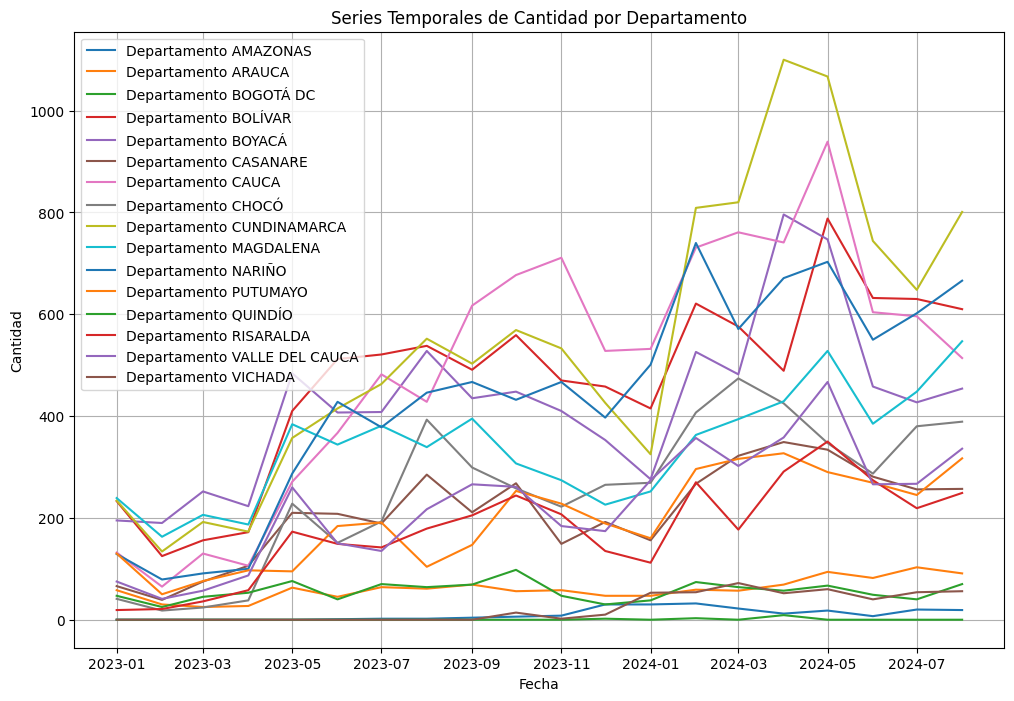

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear un gráfico
plt.figure(figsize=(12, 8))

# Iterar sobre cada departamento y graficar
for nombre, serie in series_temporales.items():
    plt.plot(serie.index, serie['cantidad'], label=f'Departamento {nombre}')

# Añadir título y etiquetas
plt.title('Series Temporales de Cantidad por Departamento')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


#Modelo Arima Basico

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Crear un diccionario para almacenar las predicciones en los datos de prueba
predicciones_dict = {}
error_metrics = {}

for nombre in series_temporales.keys():
    # Obtener datos de entrenamiento y prueba
    y_train = y_train_series[nombre]
    y_test = y_test_series[nombre]

    # Ajustar el modelo ARIMA
    #tomar,red,neurona,comparar
    model = ARIMA(y_train, order=(1, 1, 1))  # Ajusta los parámetros (p, d, q) según sea necesario
    model_fit = model.fit()

    # Predicciones para los datos de prueba
    forecast = model_fit.forecast(steps=len(y_test))

    # Almacenar las predicciones en el diccionario
    predicciones_dict[nombre] = forecast

    # Evaluar el modelo (ejemplo usando error cuadrático medio)
    mse = ((forecast - y_test) ** 2).mean()
    error_metrics[nombre] = mse

    print(f'Resumen del modelo para {nombre}:')
    print(model_fit.summary())
    print(f'Error cuadrático medio para {nombre}: {mse}')

# Convertir el diccionario de predicciones en un DataFrame
predicciones_1 = pd.DataFrame(predicciones_dict)


Resumen del modelo para AMAZONAS:
                               SARIMAX Results                                
Dep. Variable:               cantidad   No. Observations:                   16
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -49.813
Date:                Fri, 30 Aug 2024   AIC                            105.626
Time:                        01:00:36   BIC                            107.750
Sample:                    01-01-2023   HQIC                           105.603
                         - 04-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3201      2.800      0.114      0.909      -5.169       5.809
ma.L1         -0.1127      2.831     -0.040      0.968      -5.662       5.436
sigma2        44.7

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1420: RuntimeWarning: divide by zero encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum


Resumen del modelo para BOLÍVAR:
                               SARIMAX Results                                
Dep. Variable:               cantidad   No. Observations:                   16
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -90.206
Date:                Fri, 30 Aug 2024   AIC                            186.412
Time:                        01:00:36   BIC                            188.536
Sample:                    01-01-2023   HQIC                           186.389
                         - 04-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9052      1.039      0.871      0.384      -1.131       2.942
ma.L1         -0.9956      7.299     -0.136      0.892     -15.302      13.311
sigma2      9467.03

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Resumen del modelo para CAUCA:
                               SARIMAX Results                                
Dep. Variable:               cantidad   No. Observations:                   16
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -91.552
Date:                Fri, 30 Aug 2024   AIC                            189.105
Time:                        01:00:37   BIC                            191.229
Sample:                    01-01-2023   HQIC                           189.082
                         - 04-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0247      3.573      0.007      0.994      -6.977       7.027
ma.L1          0.0473      3.432      0.014      0.989      -6.679       6.774
sigma2      1.172e+04

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Resumen del modelo para MAGDALENA:
                               SARIMAX Results                                
Dep. Variable:               cantidad   No. Observations:                   16
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -84.341
Date:                Fri, 30 Aug 2024   AIC                            174.681
Time:                        01:00:37   BIC                            176.805
Sample:                    01-01-2023   HQIC                           174.659
                         - 04-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9094      0.228     -3.995      0.000      -1.356      -0.463
ma.L1          0.7103      0.703      1.010      0.313      -0.669       2.089
sigma2      4374.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Resumen del modelo para QUINDÍO:
                               SARIMAX Results                                
Dep. Variable:               cantidad   No. Observations:                   16
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -66.508
Date:                Fri, 30 Aug 2024   AIC                            139.015
Time:                        01:00:37   BIC                            141.139
Sample:                    01-01-2023   HQIC                           138.992
                         - 04-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2412      0.358      0.674      0.501      -0.461       0.943
ma.L1         -0.9992     46.593     -0.021      0.983     -92.320      90.321
sigma2       356.32

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1420: RuntimeWarning: divide by zero encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum


In [ ]:
predicciones_1

In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 37.1 MB/s eta 0:00:00


#auto_arima

In [ ]:
from pmdarima import auto_arima

model = auto_arima(y_train,
                   start_p=0, max_p=5,
                   start_q=0, max_q=5,
                   d=None,           # Se puede establecer o dejar que auto_arima lo determine
                   seasonal=False,   # Si la serie no tiene estacionalidad
                   trace=True,       # Para ver el progreso
                   error_action='ignore',  # Ignorar errores en las pruebas
                   suppress_warnings=True, # Suprimir warnings
                   stepwise=True)    # Optimización paso a paso

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=124.996, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=126.464, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=126.495, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=123.933, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=128.409, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.232 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -60.966
Date:                Fri, 30 Aug 2024   AIC                            123.933
Time:                        01:06:40   BIC                            124.641
Sample:                    01-01-2023   HQIC                           123.925
                         - 04-01-2024                                         
Co

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1420: RuntimeWarning: divide by zero encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Crear un diccionario para almacenar las predicciones en los datos de prueba
predicciones_dict = {}
error_metrics = {}

for nombre in series_temporales.keys():
    # Obtener datos de entrenamiento y prueba
    y_train = y_train_series[nombre]
    y_test = y_test_series[nombre]

    # Ajustar el modelo ARIMA
    #tomar,red,neurona,comparar
    model = ARIMA(y_train, order=(0,1,0))  # Ajusta los parámetros (p, d, q) según sea necesario
    model_fit = model.fit()

    # Predicciones para los datos de prueba
    forecast = model_fit.forecast(steps=len(y_test))

        # Alinear el índice de las predicciones con el de y_test
    forecast_index = y_test.index
    forecast_series = pd.Series(forecast, index=forecast_index)

    # Almacenar las predicciones en el diccionario
    predicciones_dict[nombre] = forecast_series

    # Evaluar el modelo (ejemplo usando error cuadrático medio)
    mse = ((forecast - y_test) ** 2).mean()
    error_metrics[nombre] = mse

    print(f'Resumen del modelo para {nombre}:')
    print(model_fit.summary())
    print(f'Error cuadrático medio para {nombre}: {mse}')

# Convertir el diccionario de predicciones en un DataFrame
predicciones_2 = pd.DataFrame(predicciones_dict)


Resumen del modelo para AMAZONAS:
                               SARIMAX Results                                
Dep. Variable:               cantidad   No. Observations:                   16
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -50.128
Date:                Fri, 30 Aug 2024   AIC                            102.256
Time:                        01:07:33   BIC                            102.964
Sample:                    01-01-2023   HQIC                           102.249
                         - 04-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        46.7999      9.308      5.028      0.000      28.556      65.044
Ljung-Box (L1) (Q):                   0.50   Jarque-Bera (JB):                16.43
Prob(Q):     

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1420: RuntimeWarning: divide by zero encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum


Resumen del modelo para CUNDINAMARCA:
                               SARIMAX Results                                
Dep. Variable:               cantidad   No. Observations:                   16
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -97.786
Date:                Fri, 30 Aug 2024   AIC                            197.572
Time:                        01:07:33   BIC                            198.280
Sample:                    01-01-2023   HQIC                           197.564
                         - 04-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       2.69e+04   6362.842      4.228      0.000    1.44e+04    3.94e+04
Ljung-Box (L1) (Q):                   0.74   Jarque-Bera (JB):                 6.34
Prob(Q): 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1420: RuntimeWarning: divide by zero encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum


#Encontrar el mejor modelo ARIMA automáticamente

In [ ]:
from pmdarima import auto_arima
import pandas as pd

for nombre in series_temporales.keys():
    # Obtener datos de entrenamiento y prueba
    y_train = y_train_series[nombre]
    y_test = y_test_series[nombre]

    # Asegurarse de que el índice sea de tipo datetime
    y_train.index = pd.to_datetime(y_train.index)
    y_test.index = pd.to_datetime(y_test.index)

    # Encontrar el mejor modelo ARIMA automáticamente
    model = auto_arima(y_train, seasonal=False, trace=True,
                       error_action='ignore', suppress_warnings=True)

    # Ajustar el modelo ARIMA con los parámetros seleccionados
    model_fit = model.fit(y_train)

    # Predicciones para los datos de prueba
    forecast = model_fit.predict(n_periods=len(y_test))

    # Alinear el índice de las predicciones con el de y_test
    forecast_index = y_test.index
    forecast_series = pd.Series(forecast, index=forecast_index)

    # Almacenar las predicciones en el diccionario
    predicciones_dict[nombre] = forecast_series

    # Evaluar el modelo (ejemplo usando error cuadrático medio)
    mse = ((forecast_series - y_test) ** 2).mean()
    error_metrics[nombre] = mse

    print(f'Resumen del modelo para {nombre}:')
    print(model_fit.summary())
    print(f'Error cuadrático medio para {nombre}: {mse}')

# Convertir el diccionario de predicciones en un DataFrame
predicciones_3 = pd.DataFrame(predicciones_dict)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=113.191, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=133.961, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=110.986, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=123.116, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=111.647, Time=0.18 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=112.219, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=112.957, Time=0.72 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=112.011, Time=0.07 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.304 seconds
Resumen del modelo para AMAZONAS:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 -53.493
Date:                Fri, 30 Aug 2024   AIC                            110.986
Time:     

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1420: RuntimeWarning: divide by zero encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=141.735, Time=0.61 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=175.034, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=139.014, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=165.044, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=139.066, Time=0.24 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=139.108, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=139.767, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=132.661, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=133.266, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=134.548, Time=1.87 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=134.628, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=133.531, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=135.022, Time=0.10 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 3.604 seconds
Resumen del modelo para ARAUCA:
                               SARIMAX Results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1420: RuntimeWarning: divide by zero encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=202.636, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=242.842, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=199.200, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=201.173, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=201.175, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=203.172, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=197.722, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=210.765, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=199.068, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=199.356, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=203.320, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.104 seconds
Resumen del modelo para BOLÍVAR:
                               SARIMAX Results       

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1420: RuntimeWarning: divide by zero encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum


In [ ]:
predicciones_3

# Arima con modelo de Machine Learning

In [ ]:

import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Diccionario para almacenar las predicciones combinadas
predicciones_combinadas = {}

# Iterar sobre cada serie temporal
for nombre in series_temporales.keys():
    # Obtener datos de entrenamiento y prueba
    y_train = y_train_series[nombre].values
    y_test = y_test_series[nombre].values


    # Ajustar el modelo ARIMA
    model_arima = ARIMA(y_train, order=(1, 1, 1))
    model_fit_arima = model_arima.fit()


    # Predicciones del ARIMA
    arima_predictions = model_fit_arima.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)

    # Calcular residuos del ARIMA
    residuals = y_test - arima_predictions

    # Usar los residuos como características para el modelo de Machine Learning
    features = pd.DataFrame({'residuals': residuals})

    # Entrenar el modelo de Machine Learning
    model_ml = RandomForestRegressor()
    model_ml.fit(features, y_test)

    # Generar predicciones del modelo de Machine Learning
    ml_predictions = model_ml.predict(features)

    # Combinar las predicciones del ARIMA y el modelo de Machine Learning
    combined_predictions = arima_predictions + ml_predictions

    # Evaluar el desempeño
    mse = mean_squared_error(y_test, combined_predictions)
    print(f'Error cuadrático medio combinado para {nombre}: {mse}')

    # Almacenar las predicciones combinadas
    predicciones_combinadas[nombre] = combined_predictions

Error cuadrático medio combinado para AMAZONAS: 101.43745491680622
Error cuadrático medio combinado para ARAUCA: 4500.438465640412


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Error cuadrático medio combinado para BOGOTÁ DC: 34.83802893680702
Error cuadrático medio combinado para BOLÍVAR: 209966.3957473044
Error cuadrático medio combinado para BOYACÁ: 482712.91803517804


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Error cuadrático medio combinado para CASANARE: 113360.60207519545
Error cuadrático medio combinado para CAUCA: 511764.80973018915
Error cuadrático medio combinado para CHOCÓ: 184625.897449097


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error cuadrático medio combinado para CUNDINAMARCA: 1044954.558492359


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error cuadrático medio combinado para MAGDALENA: 184197.5797738416
Error cuadrático medio combinado para NARIÑO: 435254.5621917867
Error cuadrático medio combinado para PUTUMAYO: 94996.81842064532


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error cuadrático medio combinado para QUINDÍO: 3098.513304205333
Error cuadrático medio combinado para RISARALDA: 63446.12654140525
Error cuadrático medio combinado para VALLE DEL CAUCA: 107611.52174280779
Error cuadrático medio combinado para VICHADA: 3053.043157712023


In [ ]:
predicciones_combinadas

#prueba de Dickey-Fuller

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(y_train)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -1.365321148321095
p-value: 0.5987841123198828


El resultado de la prueba de Dickey-Fuller aumentada (ADF) muestra un ADF Statistic de -1.365 y un p-value de 0.599. Esto indica que:

ADF Statistic: Un valor de -1.365 está relativamente cerca de 0. Valores más negativos sugieren más evidencia contra la hipótesis nula de no estacionariedad.
p-value: Un p-valor de 0.599 es mucho mayor que el umbral común de 0.05, lo que sugiere que no se puede rechazar la hipótesis nula de que la serie temporal es no estacionaria.

Aplicar diferenciación

In [ ]:
# Aplicar diferenciación
y_train_diff = np.diff(y_train, n=1)

In [ ]:
from statsmodels.tsa.stattools import adfuller

result_diff = adfuller(y_train_diff)
print(f'ADF Statistic (differenced): {result_diff[0]}')
print(f'p-value (differenced): {result_diff[1]}')

ADF Statistic (differenced): 0.7341324156604241
p-value (differenced): 0.9904949958246637


In [ ]:
# Aplicar Diferenciación Adicional
y_train_diff = np.diff(y_train, n=1)
result_diff2 = adfuller(y_train_diff)
print(f'ADF Statistic (differenced): {result_diff2[0]}')
print(f'p-value (differenced): {result_diff2[1]}')


ADF Statistic (differenced): 0.7341324156604241
p-value (differenced): 0.9904949958246637


Aplicar una transformación logarítmica y luego diferenciación

In [ ]:
# Aplicar una transformación logarítmica y luego diferenciación
y_train_log = np.log(y_train + 1)  # Se suma 1 para evitar log(0)
y_train_log_diff = np.diff(y_train_log, n=1)

result_log_diff = adfuller(y_train_log_diff)
print(f'ADF Statistic (log-differenced): {result_log_diff[0]}')
print(f'p-value (log-differenced): {result_log_diff[1]}')

ADF Statistic (log-differenced): -5.465918106028197
p-value (log-differenced): 2.4591065243331442e-06


ADF Statistic: Un valor de -5.466 es significativamente negativo, lo cual indica que hay evidencia sólida contra la hipótesis nula de no estacionariedad.
p-value: Un p-valor de 2.459 × 10⁻⁶ es mucho menor que 0.05, lo que sugiere que los datos diferenciados y transformados logarítmicamente son ahora estacionarios.

#Arima con red neuronal

In [ ]:
import numpy as np
import pandas as pd
import pmdarima as pm
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Inicializar diccionarios para almacenar resultados
predicciones_dict = {}
mse_dict = {}

for nombre in series_temporales.keys():
    y_train = y_train_series[nombre]
    y_test = y_test_series[nombre]

    # índice sea de tipo datetime
    y_train.index = pd.to_datetime(y_train.index)
    y_test.index = pd.to_datetime(y_test.index)

    # Selección automática de parámetros ARIMA usando pmdarima
    model_auto = pm.auto_arima(y_train, seasonal=False, trace=True,
                               error_action='ignore', suppress_warnings=True,
                               stepwise=True)


    # Ajustar el modelo ARIMA con los parámetros seleccionados
    best_order = model_auto.order
    model = ARIMA(y_train, order=best_order)
    model_fit = model.fit()

    # Predicciones de ARIMA
    forecast_arima = model_fit.forecast(steps=len(y_test))
    predicciones_arima[nombre] = forecast_arima

    # Calcular residuos
    residuos_train = y_train - model_fit.predict(start=0, end=len(y_train)-1)
    residuos_test = y_test - forecast_arima

    # Preparar datos para la red neuronal
    X_train = residuos_train.values.reshape(-1, 1)
    y_train_nn = residuos_train.values

    # Normalizar los datos
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Construir y entrenar la red neuronal
    model_nn = Sequential()
    model_nn.add(Input(shape=(X_train_scaled.shape[1],)))
    model_nn.add(Dense(50, activation='relu'))
    model_nn.add(Dense(1))
    model_nn.compile(optimizer='adam', loss='mean_squared_error')
    model_nn.fit(X_train_scaled, y_train_nn, epochs=20, batch_size=32, verbose=0)

    # Preparar datos de prueba para la red neuronal
    X_test = residuos_test.values.reshape(-1, 1)
    X_test_scaled = scaler.transform(X_test)

    # Predicciones de la red neuronal
    predicciones_nn = model_nn.predict(X_test_scaled).flatten()

    # Combinar predicciones ARIMA con predicciones de la red neuronal
    predicciones_finales = forecast_arima + predicciones_nn

    # Evaluar el modelo
    mse = mean_squared_error(y_test, predicciones_finales)
    mse_dict[nombre] = mse
    print(f'Error cuadrático medio para {nombre}: {mse}')

    # Calcular MAE
    mae = mean_absolute_error(y_test, predicciones_finales)
    print(f'Error absoluto medio para {nombre}: {mae}')

    # Calcular RMSE
    rmse = np.sqrt(mse)
    print(f'Error cuadrático medio raíz para {nombre}: {rmse}')

    # Almacenar las predicciones finales
    predicciones_dict[nombre] = predicciones_finales

# Mostrar las predicciones finales
for nombre, predicciones in predicciones_dict.items():
    print(f'Predicciones finales para {nombre}:')
    print(predicciones)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=113.191, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=133.961, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=110.986, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=123.116, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=111.647, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=112.219, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=112.957, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=112.011, Time=0.04 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.312 seconds
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Error cuadrático medio para AMAZONAS: 57.502305124037534
Error absoluto medio para AMAZONAS: 7.155336354350488
Error cuadrático medio raíz para AMAZONAS: 7.583027437906152
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=141.735, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Error cuadrático medio para BOGOTÁ DC: 14.240988479797355
Error absoluto medio para BOGOTÁ DC: 2.7208621302005622
Error cuadrático medio raíz para BOGOTÁ DC: 3.773723423861022
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=202.636, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=242.842, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=199.200, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=201.173, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=201.175, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=203.172, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=197.722, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=210.765, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=199.068, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=199.356, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercep

# Arima con red neuronal y Dropout

In [ ]:
import numpy as np
import pandas as pd
import pmdarima as pm
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Inicializar diccionarios para almacenar resultados
predicciones_dict = {}
mse_dict = {}

for nombre in series_temporales.keys():
    y_train = y_train_series[nombre]
    y_test = y_test_series[nombre]

    # índice sea de tipo datetime
    y_train.index = pd.to_datetime(y_train.index)
    y_test.index = pd.to_datetime(y_test.index)

    # Selección automática de parámetros ARIMA usando pmdarima
    model_auto = pm.auto_arima(y_train, seasonal=False, trace=True,
                               error_action='ignore', suppress_warnings=True,
                               stepwise=True)

    #print(f'Modelo ARIMA óptimo para {nombre}: {model_auto.summary()}')

    # Ajustar el modelo ARIMA con los parámetros seleccionados
    best_order = model_auto.order
    model = ARIMA(y_train, order=best_order)
    model_fit = model.fit()

    # Predicciones de ARIMA
    forecast_arima = model_fit.forecast(steps=len(y_test))
    #predicciones_arima[nombre] = forecast_arima

    # Calcular residuos
    residuos_train = y_train - model_fit.predict(start=0, end=len(y_train)-1)
    residuos_test = y_test - forecast_arima

    # Preparar datos para la red neuronal
    X_train = residuos_train.values.reshape(-1, 1)
    y_train_nn = residuos_train.values

    # Normalizar los datos
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

# Construir y entrenar la red neuronal
    model_nn = Sequential()
    model_nn.add(Input(shape=(X_train_scaled.shape[1],)))  # Capa de entrada
    model_nn.add(Dense(64, activation='relu'))  # Primera capa oculta con más neuronas
    model_nn.add(Dropout(0.2))  # Dropout para evitar el sobreajuste
    model_nn.add(Dense(32, activation='relu'))  # Segunda capa oculta
    model_nn.add(Dense(1))  # Capa de salida
    model_nn.compile(optimizer='adam', loss='mean_squared_error')
    # Ajustar el número de épocas y el tamaño del lote
    model_nn.fit(X_train_scaled, y_train_nn, epochs=50, batch_size=16, verbose=0)
    # Preparar datos de prueba para la red neuronal
    X_test = residuos_test.values.reshape(-1, 1)
    X_test_scaled = scaler.transform(X_test)

    # Predicciones de la red neuronal
    predicciones_nn = model_nn.predict(X_test_scaled).flatten()

    # Combinar predicciones ARIMA con predicciones de la red neuronal
    predicciones_finales = forecast_arima + predicciones_nn

    # Evaluar el modelo
    mse = mean_squared_error(y_test, predicciones_finales)
    mse_dict[nombre] = mse
    print(f'Error cuadrático medio para {nombre}: {mse}')

    # Calcular MAE
    mae = mean_absolute_error(y_test, predicciones_finales)
    print(f'Error absoluto medio para {nombre}: {mae}')

    # Calcular RMSE
    rmse = np.sqrt(mse)
    print(f'Error cuadrático medio raíz para {nombre}: {rmse}')

    # Almacenar las predicciones finales
    predicciones_dict[nombre] = predicciones_finales

# Mostrar las predicciones finales
for nombre, predicciones in predicciones_dict.items():
    print(f'Predicciones finales para {nombre}:')
    print(predicciones)






Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=113.191, Time=1.34 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=133.961, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=110.986, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=123.116, Time=0.19 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=111.647, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=112.219, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=112.957, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=112.011, Time=0.05 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.982 seconds
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Error cuadrático medio para AMAZONAS: 37.30080146817363
Error absoluto medio para AMAZONAS: 5.7723626759404345
Error cuadrático medio raíz para AMAZONAS: 6.107438208297619
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=141.735, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Error cuadrático medio para BOGOTÁ DC: 3.2267826756175566
Error absoluto medio para BOGOTÁ DC: 1.285652572320846
Error cuadrático medio raíz para BOGOTÁ DC: 1.7963247689706772
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=202.636, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=242.842, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=199.200, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=201.173, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=201.175, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=203.172, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=197.722, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=210.765, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=199.068, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=199.356, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercep

#Grafica Predicciones vs Datos Reales

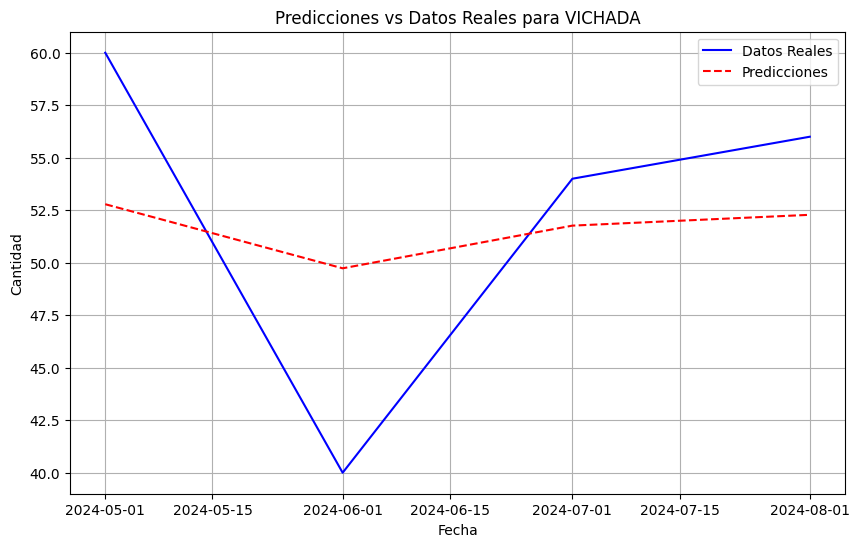

In [ ]:
import matplotlib.pyplot as plt



plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Datos Reales', color='b')
plt.plot(y_test.index, predicciones_dict['VICHADA'], label='Predicciones', color='r', linestyle='--')
plt.title('Predicciones vs Datos Reales para VICHADA')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.legend()
plt.grid(True)
plt.show()

#Implementar la validación cruzada

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

# Inicializar diccionarios para almacenar resultados
predicciones_dict = {}
mse_dict = {}

# Configurar TimeSeriesSplit para 5 divisiones
tscv = TimeSeriesSplit(n_splits=5)

for nombre in series_temporales.keys():
    y = pd.concat([y_train_series[nombre], y_test_series[nombre]])

    y.index = pd.to_datetime(y.index)

    mse_folds = []
    mae_folds = []
    rmse_folds = []

    for train_index, test_index in tscv.split(y):
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Selección automática de parámetros ARIMA usando pmdarima
        model_auto = pm.auto_arima(y_train, seasonal=False, trace=True,
                                   error_action='ignore', suppress_warnings=True,
                                   stepwise=True)

        # Ajustar el modelo ARIMA con los parámetros seleccionados
        best_order = model_auto.order
        model = ARIMA(y_train, order=best_order)
        model_fit = model.fit()

        # Predicciones de ARIMA
        forecast_arima = model_fit.forecast(steps=len(y_test))

        # Calcular residuos
        residuos_train = y_train - model_fit.predict(start=0, end=len(y_train)-1)
        residuos_test = y_test - forecast_arima

        # Preparar datos para la red neuronal
        X_train = residuos_train.values.reshape(-1, 1)
        y_train_nn = residuos_train.values

        # Normalizar los datos
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)

        # Construir y entrenar la red neuronal
        model_nn = Sequential()
        model_nn.add(Input(shape=(X_train_scaled.shape[1],)))  # Capa de entrada
        model_nn.add(Dense(64, activation='relu'))  # Primera capa oculta
        model_nn.add(Dropout(0.2))  # Dropout para evitar el sobreajuste
        model_nn.add(Dense(32, activation='relu'))  # Segunda capa oculta
        model_nn.add(Dense(1))  # Capa de salida
        model_nn.compile(optimizer='adam', loss='mean_squared_error')

        model_nn.fit(X_train_scaled, y_train_nn, epochs=50, batch_size=16, verbose=0)

        # Preparar datos de prueba para la red neuronal
        X_test = residuos_test.values.reshape(-1, 1)
        X_test_scaled = scaler.transform(X_test)

        # Predicciones de la red neuronal
        predicciones_nn = model_nn.predict(X_test_scaled).flatten()

        # Combinar predicciones ARIMA con predicciones de la red neuronal
        predicciones_finales = forecast_arima + predicciones_nn

        # Evaluar el modelo
        mse = mean_squared_error(y_test, predicciones_finales)
        mae = mean_absolute_error(y_test, predicciones_finales)
        rmse = np.sqrt(mse)

        # Almacenar métricas de cada fold
        mse_folds.append(mse)
        mae_folds.append(mae)
        rmse_folds.append(rmse)

        # Almacenar las predicciones finales
        predicciones_dict[nombre] = predicciones_finales

         # Promediar métricas sobre todos los folds
        mse_dict[nombre] = np.mean(mse_folds)
        print(f'Error cuadrático medio (promedio) para {nombre}: {np.mean(mse_folds)}')
        print(f'Error absoluto medio (promedio) para {nombre}: {np.mean(mae_folds)}')
        print(f'Error cuadrático medio raíz (promedio) para {nombre}: {np.mean(rmse_folds)}')

# Mostrar las predicciones finales
for nombre, predicciones in predicciones_dict.items():
    print(f'Predicciones finales para {nombre}:')
    print(predicciones)


/usr/local/lib/python3.10/dist-packages/pmdarima/arima/auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-103.940, Time=0.02 sec
Total fit time: 0.025 seconds
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Error cuadrático medio (promedio) para AMAZONAS: 3.7129141056867794
Error absoluto medio (promedio) para AMAZONAS: 1.8541525742006968
Error cuadrático medio raíz (promedio) para AMAZONAS: 1.9268923440832857
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.80 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=25.645, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=18.210, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.53 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=17.028, Time=0.26 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=17.600, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=16.769, Time=0.30 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=19.283, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=18.071, Time=1.79 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf,

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Error cuadrático medio (promedio) para AMAZONAS: 2.2484973853258943
Error absoluto medio (promedio) para AMAZONAS: 1.3324717759787987
Error cuadrático medio raíz (promedio) para AMAZONAS: 1.4061878193273396
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=40.438, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=59.951, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=41.845, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=40.284, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=39.776, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=38.438, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=36.706, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=38.486, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(2,0,0)(0,0

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Error cuadrático medio (promedio) para BOGOTÁ DC: 3.6737509499664896e-11
Error absoluto medio (promedio) para BOGOTÁ DC: 6.0611475398364044e-06
Error cuadrático medio raíz (promedio) para BOGOTÁ DC: 6.0611475398364044e-06
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-167.504, Time=0.03 sec
Total fit time: 0.035 seconds


/usr/local/lib/python3.10/dist-packages/pmdarima/arima/auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Error cuadrático medio (promedio) para BOGOTÁ DC: 3.673761975146189e-11
Error absoluto medio (promedio) para BOGOTÁ DC: 6.061156634783428e-06
Error cuadrático medio raíz (promedio) para BOGOTÁ DC: 6.061156634783428e-06
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-231.068, Time=0.03 sec
Total fit time: 0.026 seconds


/usr/local/lib/python3.10/dist-packages/pmdarima/arima/auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Error cuadrático medio (promedio) para BOGOTÁ DC: 2.072411524906681
Error absoluto medio (promedio) para BOGOTÁ DC: 0.665482181116971
Error cuadrático medio raíz (promedio) para BOGOTÁ DC: 0.8311501420236893
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=36.248, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=40.693, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4.000, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=42.693, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=35.688, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=44.693, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=37.688, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=42.427, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.361 seconds
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Error cuadrático medio (promedio) para BOGOTÁ DC: 2.6769246812565988
Error absoluto m

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Error cuadrático medio (promedio) para BOGOTÁ DC: 2.829506523455895
Error absoluto medio (promedio) para BOGOTÁ DC: 0.9593004415356594
Error cuadrático medio raíz (promedio) para BOGOTÁ DC: 1.2934401750459656
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=70.484, Time=1.58 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=71.064, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=68.584, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=66.397, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=64.407, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.90 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 4.168 seconds
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Error cuadrático medio (promedio) para BOLÍVAR: 89280.15548384121
Error absoluto medio (prom

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Error cuadrático medio (promedio) para CAUCA: 135276.08313978885
Error absoluto medio (promedio) para CAUCA: 348.4123307675786
Error cuadrático medio raíz (promedio) para CAUCA: 359.80657797321146
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=166.533, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=139.894, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=159.681, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=141.689, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=141.788, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=140.433, Time=0.06 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.508 seconds
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Error cuadrático medio (promedio) para CAUCA: 95732.47753586581
Error absoluto medio (promedio)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Error cuadrático medio (promedio) para PUTUMAYO: 6594.147106204679
Error absoluto medio (promedio) para PUTUMAYO: 71.54939963911629
Error cuadrático medio raíz (promedio) para PUTUMAYO: 81.2043539855141
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=101.941, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=92.570, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=94.562, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=89.345, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=88.157, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.479 seconds
1/1 ━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Error cuadrático medio (promedio) para VICHADA: 3.6737509499664896e-11
Error absoluto medio (promedio) para VICHADA: 6.0611475398364044e-06
Error cuadrático medio raíz (promedio) para VICHADA: 6.0611475398364044e-06
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-167.504, Time=0.02 sec
Total fit time: 0.023 seconds


/usr/local/lib/python3.10/dist-packages/pmdarima/arima/auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Error cuadrático medio (promedio) para VICHADA: 31.734973487983844
Error absoluto medio (promedio) para VICHADA: 2.60195021348536
Error cuadrático medio raíz (promedio) para VICHADA: 3.983404434397233
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=72.918, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=65.121, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=66.918, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=66.918, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=68.918, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=65.760, Time=0.01 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.172 seconds
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Error cuadrático medio (promedio) para VICHADA: 291.12171309060676
Error absoluto medio (promedio) para VICHADA: 10.033619106616856
Error cuadrático medio raíz (promedio) para VICHADA: 12.141822155689804
Performing step

In [ ]:
predicciones_finales

,predicted_mean
2024-06-01,57.477829
2024-07-01,58.794643
2024-08-01,58.983389


#Grafica Predicciones vs Datos Reales

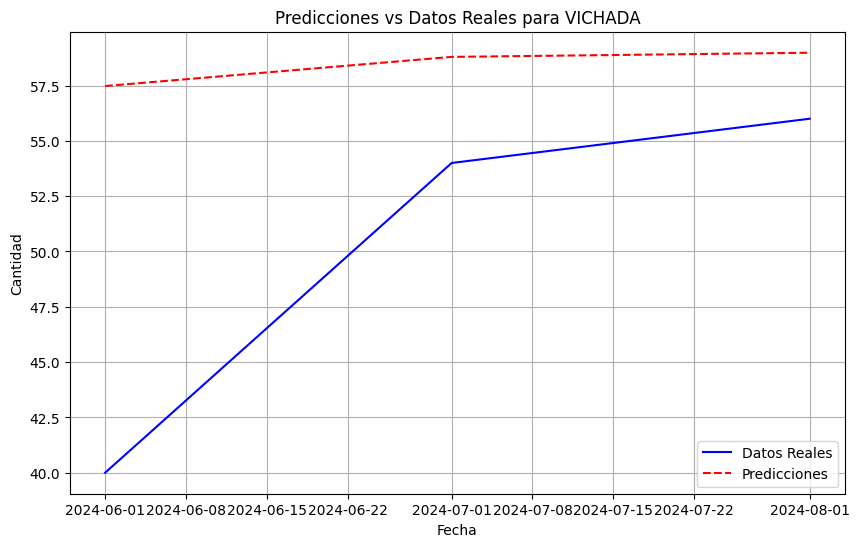

In [ ]:
import matplotlib.pyplot as plt



plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Datos Reales', color='b')
plt.plot(y_test.index, predicciones_dict['VICHADA'], label='Predicciones', color='r', linestyle='--')
plt.title('Predicciones vs Datos Reales para VICHADA')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.legend()
plt.grid(True)
plt.show()

#conclusiones y recomendaciones



1-la data actual no es concluyente para hacer una prediccion efectiva

2-se experimento con diferentes metodos como son(red neuronal,series de tiempo,convinacion entre redes neuronales y series de tiempo),para este dataset el metodo que mejor prediccion arrojo es la convinacion entre redes neuronales y series de tiempo

3-Este proyecto seguira actualizandose con los datos completos del 2024 para buscar una prediccion mas efectiva

#Referencias



.Apoyo con CHATGPT(promt)

.Documentos proporcionados durante bootcamp(referenciar,temas)